# *Problem Statement 2:*

# *Importing Libraries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from io import StringIO
import seaborn as sns

# *Importing DataSet*

In [2]:
url = "https://docs.google.com/spreadsheets/d/15kNYsJrJDzR0Rq1w6P-SmDkGE_0eoyLs/edit?usp=share_link&ouid=115491796893218151779&rtpof=true&sd=true"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df=pd.read_excel(path)

# *Data understanding and exploration*

In [3]:
#Verifying first 5 records
df.head()

,observation,feature,price
0,0.44,0.68,511.14
1,0.99,0.23,717.10
2,0.84,0.29,607.91
3,0.28,0.45,270.40
4,0.07,0.83,289.88


In [4]:
#Verifying last 5 records
df.tail()

,observation,feature,price
95,0.99,0.13,636.22
96,0.28,0.46,272.12
97,0.87,0.36,696.65
98,0.23,0.87,434.53
99,0.77,0.36,593.86


In [5]:
#Verifying any randomly 5 records
df.sample(5)

,observation,feature,price
9,0.27,0.95,511.06
0,0.44,0.68,511.14
21,0.36,0.43,308.68
82,0.70,0.57,684.38
95,0.99,0.13,636.22


In [6]:
#Checking the dimensions of the dataset
df.shape

(100, 3)

### Observations : 
#####  1. total records : 100
#####   2. total features : 3

In [7]:
#Understanding the feature names, not null values ,dtypes and memory using info() function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   observation  100 non-null    float64
 1   feature      100 non-null    float64
 2   price        100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [8]:
#Understanding the stastical data for numerical dtypefeatures
df.describe()

,observation,feature,price
count,100.000000,100.000000,100.000000
mean,0.550300,0.501700,554.214600
std,0.293841,0.307124,347.312796
min,0.010000,0.000000,42.080000
25%,0.300000,0.230000,278.172500
50%,0.570000,0.485000,514.285000
75%,0.822500,0.760000,751.752500
max,1.000000,0.990000,1563.820000


# *Data cleaning*

#### 1. Handling Missing Values

In [9]:
#Checking whether missing values are present or not
df.isnull().sum()

observation    0
feature        0
price          0
dtype: int64

### Observations : 
#####  No missing values are present in the dataset

#### 2. Handling Dulplicate Records

In [10]:
#Checking whether duplicate records are present or not
df.duplicated().sum()

0

In [11]:
#Correlation between numerical data in the datsset
df.corr()

,observation,feature,price
observation,1.000000,0.041766,0.764315
feature,0.041766,1.000000,0.627476
price,0.764315,0.627476,1.000000


<AxesSubplot:>

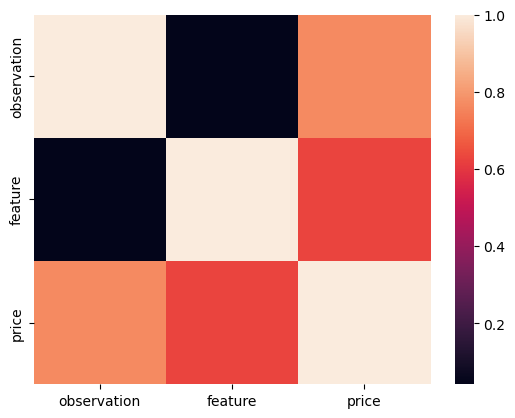

In [12]:
#Understanding the correlation between numerical features using heatmap of seaborn library
sns.heatmap(df.corr())

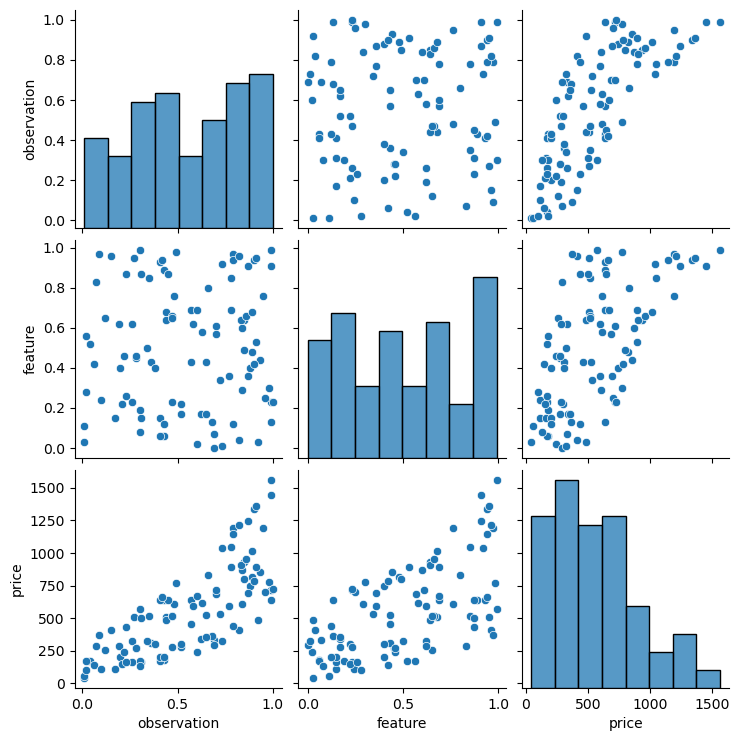

In [13]:
sns.pairplot(df)

# Model building and evaluation*

In [14]:
X=df.iloc[:,:-1]

In [15]:
y=df.iloc[:,-1]

In [16]:
X.shape

(100, 2)

In [17]:
y.shape

(100,)

In [18]:
#importing train test split
from sklearn.model_selection import train_test_split

In [19]:
#Splitting data into X_train,X_test,y_train ,y_test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [20]:
X_train.shape

(80, 2)

In [21]:
X_test.shape

(20, 2)

In [22]:
y_train.shape

(80,)

In [23]:
y_test.shape

(20,)

# Multiple Linear Regression 

In [24]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [25]:
reg.fit(X_train,y_train)

LinearRegression()

In [26]:
y_pred_reg=reg.predict(X_test)
y_pred_reg

array([ 426.09146539,   58.82595194,  671.86958179,   70.59925474,
        655.72394234,  237.66554823,  588.89726222,  571.74180841,
        677.2517328 ,  698.94769006,  751.25407187,  971.69207474,
       1054.21622072, 1151.03617141,  526.05107197,  399.51785749,
        986.38053984,  118.5888131 ,  890.9059235 ,  704.55433467])

In [27]:
X_pred_reg=reg.predict(X_train)
X_pred_reg

array([ 425.92329859,  180.70600937,  283.91711185,  840.50570322,
       1076.97750554, -229.22323822,  988.28670137,  656.17211592,
        732.30511012,  932.16799649,  892.64391824,  809.95160547,
        728.54911385,  115.28099041,  709.03932492,  875.20845764,
        910.24754564,  -12.26122483,  199.48680433,  599.04441028,
        764.54087582,  549.37318397,  659.47993861,  130.97845627,
        348.33313005,  311.4997205 ,  596.46558156,  663.29226168,
        283.52445146,  847.96218257,  816.39908405, 1166.39730369,
        575.61045828,  607.90255078,  339.13865596, -176.74868961,
       1104.95277459,  696.59335494,  395.53736763,  457.76721751,
        160.13089288, 1073.89417645,  585.81393313,  377.82190024,
       1093.74029897,  801.65429215,  490.28298999,  349.6221376 ,
        142.52726548,  773.34268952,  849.47568372,  274.27446418,
        122.00847578,  744.19025291,  515.39942354,  516.3520975 ,
        713.18798158,  369.52458692,  127.22246   ,  582.33794

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='price'>

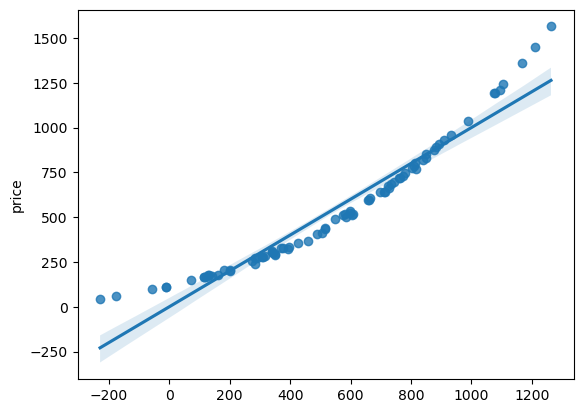

In [28]:
sns.regplot(X_pred_reg,y_train)

In [29]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

In [30]:
MAE=mean_absolute_error(y_test,y_pred_reg)
MAE

66.14901603991562

In [31]:
MSE=mean_squared_error(y_test,y_pred_reg)
MSE

5662.710743101956

In [32]:
RMSE=math.sqrt(MSE)
RMSE

75.25098499755306

In [33]:
r2=r2_score(y_test,y_pred_reg)
r2

0.9490855714558896

# Conclusion :
        1. MAE = 66.14901603991562
        2. MSE = 5662.710743101956
        3. RMSE = 75.25098499755306
        4. r2 =  0.9490855714558896      
   

# Polynomial regression

In [55]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
model1  = LinearRegression()
model2=model1.fit(X_poly,y_train)

In [56]:
xpred=model2.predict(X_poly)
xpred

array([ 360.92695347,  204.90662475,  268.36062424,  828.83646911,
       1199.34726292,   44.46824887, 1039.28238312,  594.40100929,
        686.90697696,  961.61694613,  902.48142595,  785.97795538,
        659.96474332,  166.93044518,  642.11453815,  877.78534316,
        928.73326116,  111.43866739,  202.66862325,  531.76787652,
        719.56608756,  482.32302768,  599.74420111,  171.13957794,
        292.29128778,  275.34781509,  532.18792123,  596.76416555,
        246.27965106,  830.86614175,  772.96741032, 1360.66317989,
        506.67863317,  527.4764791 ,  306.16387563,   57.23520847,
       1244.55788474,  639.93519926,  329.56724631,  366.91105296,
        177.60612385, 1185.21170255,  501.96108873,  331.96132801,
       1221.86829832,  771.26294438,  407.89995966,  290.46271816,
        168.74006451,  731.05662354,  840.89178233,  255.27692231,
        168.84271106,  698.77708534,  431.07568652,  436.86007979,
        641.73609092,  329.27514935,  173.22864409,  515.14430

In [62]:
y_pred1 = model2.predict(poly_reg.fit_transform(X_test))
y_pred1

array([ 358.22665862,  131.8606267 ,  609.07967727,  148.93622328,
        567.10325453,  238.59255653,  521.45966334,  486.61531019,
        621.07157424,  633.27165403,  703.29081254, 1023.26249973,
       1151.29894986, 1330.92874417,  462.32258935,  339.77272089,
       1039.98597788,  170.33119764,  901.30106267,  634.84268755])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='price'>

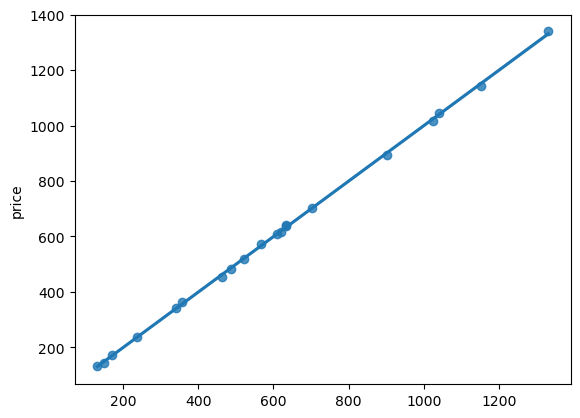

In [63]:
sns.regplot(y_pred1,y_test)